In [21]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sb

In [22]:
boston_dataset=load_boston()

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
X=boston[['ZN','RM']]
X=np.array(X)
Y=boston_dataset.target
Y=np.array(Y)

X.shape


(506, 2)

Text(0.5, 1.0, 'Correlation between price and features')

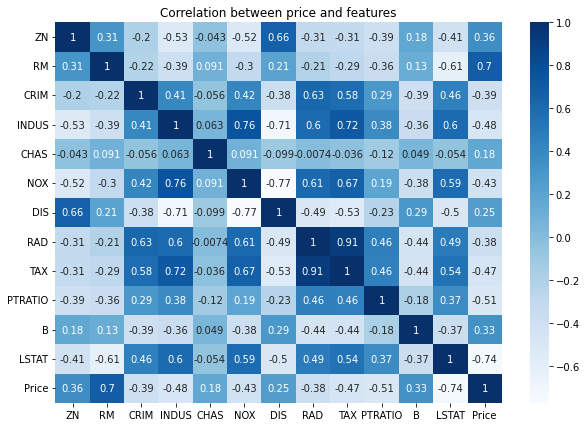

In [24]:
#correlation map

df=pd.DataFrame(data=boston[['ZN','RM','CRIM','INDUS','CHAS','NOX','DIS','RAD','TAX','PTRATIO','B','LSTAT']])
df['Price']=Y
plt.figure(figsize=(10,7))
sb.heatmap(df.corr(),annot=True,cmap=plt.get_cmap('Blues'))
plt.title('Correlation between price and features')



In [25]:
class PerceptronRegressor:
    def __init__(self):
         pass

    def fit(self,X,Y):

        #hyper paremeters
        learning_rate=0.0001
        epocs=4

        Errors=[]
        N=X.shape[0]
        self.w=np.random.rand(2,1)
       
        for n in range(N):
            x=X[n,0:2]
            y_pred=np.matmul(x,self.w)
            e=Y[n]-y_pred
            x=x.reshape(-1,1)
            self.w+=learning_rate*e*x
            
            #visualization
            Y_pred=np.matmul(X,self.w)
            errors=np.mean(Y-Y_pred)
            Errors.append(errors)
        plt.figure()
        plt.plot(np.arange(0,N,1),Errors)
        plt.grid()
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Training Curve')

    def predict(self,X_test):
        Y_pred=np.matmul(X_test,self.w)  
        return Y_pred    

    def evaluate(self,X_test,Y_test):
        Y_pred=np.matmul(X_test,self.w)
        MAE=np.mean(np.abs(np.subtract(Y_test,Y_pred)))

        return MAE
        
       







In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=30)

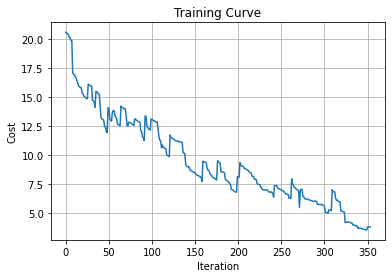

In [27]:
perceptron=PerceptronRegressor()
perceptron.fit(X_train,Y_train)


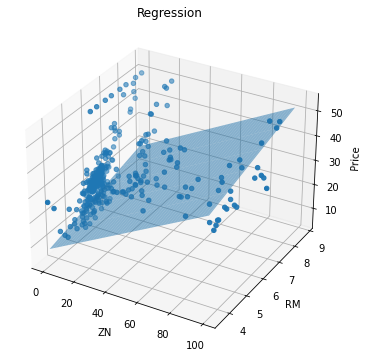

In [28]:
fig=plt.figure(figsize=(6,6))
p = fig.add_subplot(111,projection='3d')

x = np.arange(X_train[:,0].min(), X_train[:,0].max())
y = np.arange(X_train[:,1].min(), X_train[:,1].max())

x, y = np.meshgrid(x, y)

plane = x *perceptron.w[0] + y *perceptron. w[1]

p.plot_surface(x, y, plane,alpha=0.5)

p.scatter(X_train[:,0], X_train[:,1], Y_train)

p.set_xlabel('ZN')
p.set_ylabel('RM')
p.set_zlabel('Price')
p.set_title('Regression')
#p.view_init(-140,60)#angle of the plane
plt.show()

In [29]:


for i in range(len(X_test)):
    predicted_price=perceptron.predict(X_test[i,0:2])
    print(predicted_price)

[14.15395682]
[13.80515017]
[14.56208433]
[16.27764355]
[14.5739485]
[14.40785009]
[41.42250123]
[24.80025433]
[13.20482308]
[15.96205658]
[35.59068458]
[27.24043649]
[14.59767684]
[21.59532801]
[13.89769071]
[23.26663048]
[15.72951882]
[14.57869417]
[13.793286]
[15.22647794]
[18.10998012]
[15.79595818]
[15.73426449]
[20.62566587]
[15.13868307]
[14.06141628]
[13.71972814]
[9.81878849]
[14.08514462]
[13.32821047]
[14.35802057]
[14.28683554]
[17.45931505]
[26.73344992]
[14.11599147]
[14.37700325]
[12.23196101]
[14.8990268]
[13.93328323]
[15.11970039]
[12.72313771]
[13.94989307]
[45.32581371]
[15.02715986]
[13.90243638]
[14.32480089]
[17.54236425]
[21.94736171]
[22.48124944]
[13.81464151]
[14.05667061]
[14.4292056]
[14.50276347]
[14.8847898]
[15.57291175]
[41.13301544]
[18.81420346]
[15.44715153]
[11.77637681]
[28.59532489]
[13.9522659]
[16.12103648]
[26.68756609]
[14.52649181]
[15.19563109]
[13.88582654]
[15.22647794]
[14.66886187]
[18.55556451]
[32.01706048]
[15.27156179]
[16.56238367]


In [30]:
MAE=perceptron.evaluate(X_test,Y_test)
print(MAE)


9.23518575910681
